In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Australian Rainy Weather Prediction
 Dataset:***

*   **Date**

*   **Location:**	49 different locations has been considered.

*   **MinTemp:** Minimum temp in degree celcius

*   **MaxTemp:** Maximum temp in degree celcius

*   **Rainfall:**	The amount of rainfall recorded for the day in mm.

*   **Evaporation:**	Evaporation(mm) in 24hours


*   **Sunshine:**	number of hours of bright sunshine.

*   **WindGustDir:**	The direction of the strongest wind gust in the 24 hours to midnight

*   **WindGustSpeed:**	The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   **WindDir9am, WindDir3pm:**	Direction of wind at 9am and 3pm

*   **WindSpeed9am, WindSpeed3pm:** Speed of wind at 9am and 3pm

*   **Humidity9am, Humidity3pm:** Humidity at 9am and 3pm
*   **Pressure9am, Pressure3pm:** Atmospheric pressure at 9am and 3pm

*   **Cloud9am, Cloud3pm:** Fraction of sky obscured by cloud at 9am

*   **Temp9am, Temp3pm:** Temperature at 9am and 3pm

*   **RainToday:**
         1 = rained today
         0 = didn't rain today
*   **RainTomorrow [Target column]:**          
         
         1 = Will be raining tomorrow
         0 = won't be raining tomorrow





In [ ]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1GIZGQ2_jJHRJh6Cx8UY-uVqXFTMtAXbT/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,145460.000000
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,11/12/2013,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,NaN
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,0.241599
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,0.428054
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,0.000000
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,0.000000


In [ ]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


RainTomorrow
0    110317
1     35143
Name: count, dtype: int64


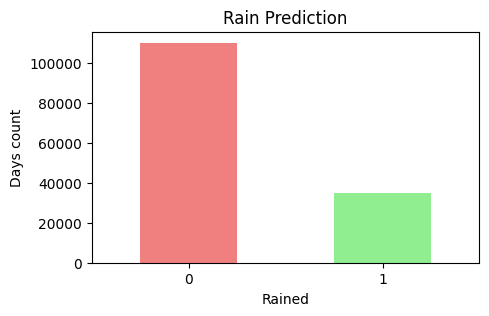

In [ ]:
# Visualize the distribution of the 'RainTomorrow' variable

print(df.value_counts('RainTomorrow'))

plt.figure(figsize=(5, 3))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Rain Prediction')
plt.xlabel('Rained')
plt.ylabel('Days count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

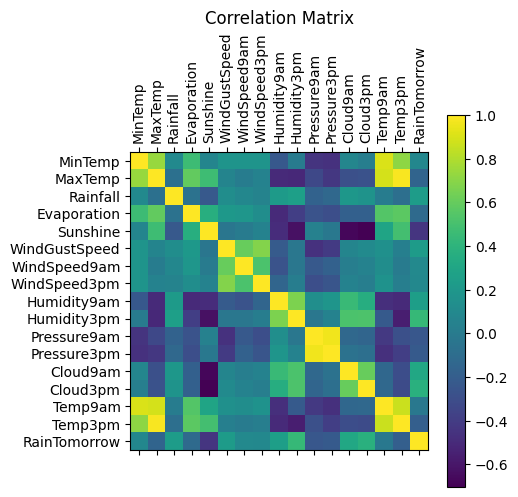

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [ ]:
#drop redundant feature(s)
df = df.drop(['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0


In [ ]:
#drop duplicates
df = df.drop_duplicates()
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0


In [ ]:
# Drop rows with missing values
df.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [ ]:
# Fill missing values in numerical features with column's mean value
columns_to_fill = [
    'WindSpeed9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.611212,7.712435,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.494952,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,5.611212,7.712435,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.411175,4.494952,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,5.611212,7.712435,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.411175,2.000000,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,5.611212,7.712435,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.411175,4.494952,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,5.611212,7.712435,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,5.611212,7.712435,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.411175,4.494952,9.4,20.9,No,0
145455,Uluru,2.8,23.4,0.0,5.611212,7.712435,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.411175,4.494952,10.1,22.4,No,0
145456,Uluru,3.6,25.3,0.0,5.611212,7.712435,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.411175,4.494952,10.9,24.5,No,0
145457,Uluru,5.4,26.9,0.0,5.611212,7.712435,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.411175,4.494952,12.5,26.1,No,0


In [ ]:
df.shape

(124513, 22)

In [ ]:
#check for total null value for each feature
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
#check for categorical and numerical variables in df
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


In [ ]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
df.isnull().sum()
df.shape

(124513, 114)

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,5.611212,7.712435,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,True,False,True,False
1,7.4,25.1,0.0,5.611212,7.712435,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,True,True,False
2,12.9,25.7,0.0,5.611212,7.712435,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,True,True,False
3,9.2,28.0,0.0,5.611212,7.712435,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,True,False
4,17.5,32.3,1.0,5.611212,7.712435,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.shape

(124513, 114)

# Implementing AdaBoost using Scikit-learn Library

sklearn AdaBoost reference: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['RainTomorrow'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (99610, 113)
X_test shape: (24903, 113)
y_train shape: (99610,)
y_test shape: (24903,)


In [ ]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.817
Accuracy score (validation): 0.819


In [ ]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.837
Accuracy score (validation): 0.839


# Homework
Perform EDA and pre processing for the dataset below and then complete library implementation of AdaBoost Algorithm.

Dataset link for homework: **[click here](https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view?usp=sharing)**

Try with different number of estimators & learning rate and find the best model.

n_estimators_list = [10, 50, 100, 200, 500, 1000] <br>
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]

In [ ]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [ ]:
df.shape

(193, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [ ]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


<Figure size 800x600 with 0 Axes>

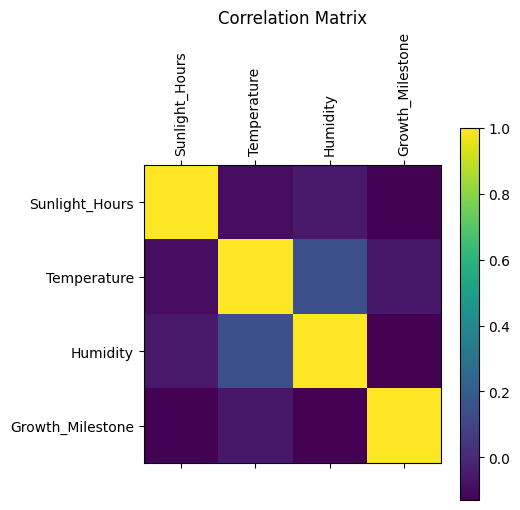

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

## Data Preprocessing

In [ ]:
df = df.drop_duplicates()
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
# Fill missing values in numerical features with column's mean value
columns_to_fill = [
   "Sunlight_Hours",  "Temperature", "Humidity"
]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,25.017731,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])
df.isnull().sum()
df.shape

(193, 13)

In [ ]:
df.head(5)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,False,True,False,True,False,False,True,False,False
1,4.033133,28.919484,52.422276,1,False,False,True,False,False,True,False,False,True
2,8.892769,23.179059,44.660539,0,False,True,False,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,False,True,False,True,False,False,False,True,False
4,8.374043,25.017731,63.625923,0,False,False,True,True,False,False,False,False,True


In [ ]:
df.isnull().sum()

,0
Sunlight_Hours,0
Temperature,0
Humidity,0
Growth_Milestone,0
Soil_Type_clay,0
Soil_Type_loam,0
Soil_Type_sandy,0
Water_Frequency_bi-weekly,0
Water_Frequency_daily,0
Water_Frequency_weekly,0


In [ ]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['Growth_Milestone'], axis=1)

y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## AdaBoost from Scratch

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

class AdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=50, learning_rate=1.0, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1, random_state=self.random_state)
            stump.fit(X, y, sample_weight=w)
            pred = stump.predict(X)
            err = np.sum(w * (pred != y)) / np.sum(w)

            if err == 0:
                alpha = 1
            else:
                alpha = 0.5 * np.log((1 - err) / (err + 1e-10)) * self.learning_rate

            w *= np.exp(-alpha * y * pred)
            w /= np.sum(w)

            self.models.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            pred += alpha * model.predict(X)
        return np.sign(pred)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

# testing driver code
abc = AdaBoostClassifier(n_estimators=5, learning_rate=1, random_state=42)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(abc.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(abc.score(X_test, y_test)))

Accuracy score (training): 0.617
Accuracy score (validation): 0.641


In [ ]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]

best_score = 0
best_params = {}

for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        abc = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        abc.fit(X_train, y_train)
        score = abc.score(X_test, y_test)
        print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, Validation Accuracy: {score:.3f}")

        if score > best_score:
            best_score = score
            best_params = {"n_estimators": n_estimators, "learning_rate": learning_rate}

print(f"Best Model -> n_estimators: {best_params['n_estimators']}, learning_rate: {best_params['learning_rate']}, Best Accuracy: {best_score:.3f}")

n_estimators: 10, learning_rate: 0.01, Validation Accuracy: 0.513
n_estimators: 10, learning_rate: 0.1, Validation Accuracy: 0.692
n_estimators: 10, learning_rate: 0.5, Validation Accuracy: 0.641
n_estimators: 10, learning_rate: 0.9, Validation Accuracy: 0.641
n_estimators: 10, learning_rate: 0.99, Validation Accuracy: 0.641
n_estimators: 50, learning_rate: 0.01, Validation Accuracy: 0.692
n_estimators: 50, learning_rate: 0.1, Validation Accuracy: 0.641
n_estimators: 50, learning_rate: 0.5, Validation Accuracy: 0.641
n_estimators: 50, learning_rate: 0.9, Validation Accuracy: 0.641
n_estimators: 50, learning_rate: 0.99, Validation Accuracy: 0.641
n_estimators: 100, learning_rate: 0.01, Validation Accuracy: 0.692
n_estimators: 100, learning_rate: 0.1, Validation Accuracy: 0.641
n_estimators: 100, learning_rate: 0.5, Validation Accuracy: 0.641
n_estimators: 100, learning_rate: 0.9, Validation Accuracy: 0.641
n_estimators: 100, learning_rate: 0.99, Validation Accuracy: 0.641
n_estimators: 